In [4]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color: #3636ff; font-family:'Orbitron' ; text-shadow: 5px 5px 5px #aaa;}
div.output_area pre , div.output_area html {font-size:110%; color: #3636ff;}     
</style>

In [8]:
%display ascii_art

## For creating posts

# When the task and the explanation
# are not the same in difficulty levels
To solve is much faster than to draw :)

Jupyter Notebook & Python Kernel

Problem. You're on one vertex of a cube. You want to travel along edges to visit each other vertex exactly once before returning to the starting vertex. Can you do it? What if it's a four-dimensional hypercube?
https://www.facebook.com/googlecodejam/

Decision. Let's give each vertex its unique binary number (from '0000' to '1111'). We have 4 "hyperplane" in this four-dimensional hypercube. The successful way to solve this problem is to visit every hyperplane in the order  '00','01','11','10'. On each plane, vertices should be visited: 

1st - in the same order '0000', '0001', '0011', '0010', 

2nd - in the opposite direction '0110', '0111', '0101', '0100', 

3rd - in the same order '1100', '1101', '1111', '1110', 

4th - in the opposite direction 1010', '1011', '1001', '1000'.

In [9]:
st = ['00','01','11','10']; path = []
for i in range(4):
    if i%2 == 0:
        for j in range(4): path.append(st[i]+st[j])
    else:
        for j in range(3,-1,-1): path.append(st[i]+st[j])
print(path[:8]); print(path[8:])

['0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100']
['1100', '1101', '1111', '1110', '1010', '1011', '1001', '1000']


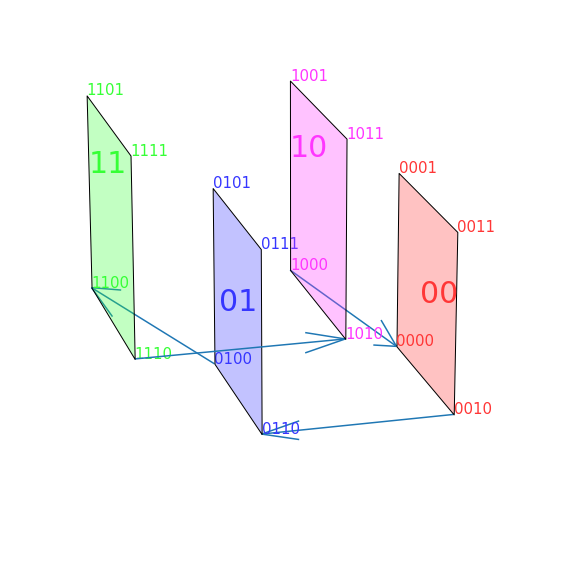

In [11]:
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
d = 0.8; f = plt.figure(figsize=(10,10)); ax = f.add_subplot(111, projection='3d')
verts = [ [ [[0,0,0],[0,0,1],[0,1,1],[0,1,0]] ], 
          [ [[1,1,0],[1,1,1],[1,0,1],[1,0,0]] ],
          [ [[1+d,0+d,0+d],[1+d,0+d,1+d],[1+d,1+d,1+d],[1+d,1+d,0+d]] ],
          [ [[0+d,1+d,0+d],[0+d,1+d,1+d],[0+d,0+d,1+d],[0+d,0+d,0+d]] ]]
face_colors = ['#ff3636ff','#3636ff','#36ff36','#ff36ff']
q = [[0,1,0,1,0,0],[1,0,0,d,d,d],[1+d,1+d,0+d,-1,0,0],[0+d,0+d,0+d,-d,-d,-d]]
tc = [[0,d/2,d/2],[1+d/2,1+d,1],[1+d,d,1+d/2],[d,d,1+d/2]]
for i in range(4):
    lines = Poly3DCollection(verts[i],lw=1,alpha=0.3,edgecolors='black',facecolor='none')
    lines.set_facecolor(face_colors[i]); ax.add_collection3d(lines)
    ax.quiver(q[i][0],q[i][1],q[i][2],q[i][3],q[i][4],q[i][5],arrow_length_ratio=0.2) 
    ax.text(tc[i][0],tc[i][1],tc[i][2],st[i],color=face_colors[i],fontsize=30)
    for j in range(4):
        ax.text(verts[i][0][j][0],verts[i][0][j][1],verts[i][0][j][2],
                path[4*i+j],color=face_colors[i],fontsize=15)
ax.set_xlim(0,1.5); ax.set_ylim(0,1.5); ax.set_zlim(0,1.5);
plt.axis('off'); ax.view_init(20,75);

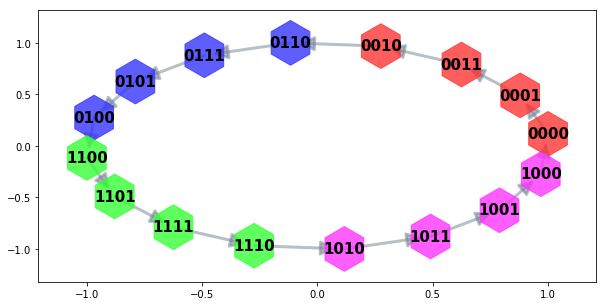

In [10]:
import pylab, networkx
pylab.figure(figsize=(10,5)); G = networkx.MultiDiGraph()
node_colors = 2*['#3636ff']+4*['#ff3636']+2*['#3636ff']+4*['#36ff36']+4*['#ff36ff']
edge_list = [('0000','0001'),('0001','0011'),('0011','0010'),('0010','0110'), 
             ('0110','0111'),('0111','0101'),('0101','0100'),('0100','1100'),
             ('1100','1101'),('1101','1111'),('1111','1110'),('1110','1010'),
             ('1010','1011'),('1011','1001'),('1001','1000'),('1000','0000')]
G.add_edges_from(edge_list)
pos = networkx.kamada_kawai_layout(G)
networkx.draw_networkx_edges(G, pos, width=3, alpha=0.5, edge_color='slategray',
                       arrowsize=30, arrowstyle='-|>')
networkx.draw_networkx_nodes(G, pos, node_size=2000, node_shape='h', 
                             alpha=0.8,node_color=node_colors)
networkx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold')

ax.axis('off'); pylab.show()

## Additional cells

In [12]:
%%r
library(pracma)
# (2,2,2,2,2,2,2,2,2,2) the start point
system <- function(x){
    c(x[1] + x[4] - 3,
      x[2] + x[5] - 4, 
      x[3] + x[6] - 1, 
      x[1] * x[8] + x[2] * x[9] + x[3] * x[10],
      x[7] * x[8] - x[4],
      x[7] * x[9] - x[5], 
      x[7] * x[10] - x[6],
      x[1] * x[8] - 1,
      x[4] * x[9] - 4,
      x[8] + x[10] - 2)
}
print('x1 x2 x3 x4 x5 x6 x7 x8 x9 x10')
round(fsolve(system, c(2,2,2,2,2,2,2,2,2,2))$x)















[1] "x1 x2 x3 x4 x5 x6 x7 x8 x9 x10"
 [1]  1  0 -1  2  4  2  2  1  2  1


In [175]:
%%r
plotting <- function(x,f){
    pdf(f); plot(x); dev.off()
}
plotting(c(1:20),'01.pdf') 




null device 
          1 
